# 1. Preps

In [1]:
def sigma_S_section(S,S_B,sigma,Q_in,Q_out,M,Nt,Ni,xA,xB,mean,AB='False'):
    '''
    This function plots a sigma-salinity-section either at a chosen x and a constant step in time, or at chosen x but taking the mean over all timesteps.
    The variables consist of:
    S - salinity
    sigma - depth in sigma coordinates
    Nt, Ni - index of respectively chosen step in time and chosen x
    mean - set to True if you plot the salinity as 
    '''
    fig, ax = plt.subplots()
    ax.plot(S,sigma,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=6,label='A')
    ax.grid() 
    textstr = '\n'.join((
        r'$Q_{in}'+f' = {Q_in:.1f} '+r'm^3 s^{-1}$',
        r'$Q_{out}'+f' = {Q_out:.1f} '+r'm^3 s^{-1}$',
        f'M = {M:.1f} '+r' $m^3 s^{-1} '+r'(g kg^{-1})^2$'))
    props = dict(boxstyle='round', facecolor='moccasin', alpha=.6)
    ax.text(0.03, 0.5, textstr, transform=ax.transAxes, fontsize=14, color='k',
            verticalalignment='top', bbox=props)
    if mean==True:
        ax.set(xlabel='S [g kg-1]', ylabel='sigma',title='Ni = '+str(Ni))
        plt.savefig('./figs/sigma_s_Mean_'+str(Ni)+'.png',dpi=140, facecolor='w', edgecolor='w',
                    orientation='landscape',transparent=False, bbox_inches='tight', pad_inches=0.1)
        if AB==True:
            ax.plot(S_B,sigma,color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=6,label='B')
            ax.legend()   
            ax.set(xlabel='S [g kg-1]', ylabel='sigma',title='A: '+str(xA)+', B: '+str(xB))
            plt.savefig('./figs/sigma_s_AB_'+str(Ni)+'.png',dpi=140, facecolor='w', edgecolor='w',
                        orientation='landscape',transparent=False, bbox_inches='tight', pad_inches=0.1)
    if mean==False:
        ax.set(xlabel='S [g kg-1]', ylabel='sigma',title='Nt, Ni = '+str(Nt)+', '+str(Ni))
        plt.savefig('./figs/sigma_s_'+str(Nt)+'_'+str(Ni)+'.png',dpi=140, facecolor='w', edgecolor='w',
                    orientation='landscape',transparent=False, bbox_inches='tight', pad_inches=0.1)

## 1.1 Import packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4

## 1.2 Pre-set parameters for plotting

In [3]:
plt.rcParams.update({
    "font.weight": "normal",
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "lines.color": "k",
    "axes.titlesize": 18,
    "axes.titleweight": "normal",
    "axes.labelweight": "bold",
    "axes.labelsize": 18,
    "contour.linewidth": 0.8
})

## 1.3 Equations

#### The Knudsen relations (Knudsen, 1900) are defined as:

$Q_{in} = \frac{s_{out}}{s_{in}-s_{out}} Q_{riv}$

$Q_{out} = - \frac{s_{in}}{s_{in}-s_{out}} Q_{riv}$

#### MacCready et al. (2011) derived an expression for the mixing $M$ which goes as follows:

$M = s_{in} s_{out} Q_{riv}$

# 2. Open datasets and extract variables

In [4]:
path_file = '/home/henell/WORK/tools/GETM/setups/warner/warner.3d.nc'
id_file = netCDF4.Dataset(path_file, 'r')

xc    = id_file.variables['xc'][:]
time  = id_file.variables['time'][:]
sigma = id_file.variables['sigma'][:]
salt  = id_file.variables['salt'][:,:,0,:]
Q_riv = 50. # river discharge [m3 s-1]

In [5]:
np.shape(salt)

(113, 41, 201)

# 3. Calculations

# 3.1 First tests
#### I assume that at the sigma index twenty ($sigma=20$), the channel is divided into an upper and lower layer. Above we have the inflow $Q,_{in}$ with $s,_{in}$, and below we have the outflow $Q,_{out}$ with $s,_{out}$.
#### For first tests, we choose a step in time and a specific x section.

In [6]:
Nt = 10
Ni = 50
salt_Knudsen = salt[Nt,:,Ni]

In [7]:
Nk = np.shape(salt_Knudsen[:])
Nk = ''.join(map(str, Nk))
print('\n Shape of the domain Nk = ',Nk)
print('\n')


 Shape of the domain Nk =  41




In [8]:
Nk_mid = 20
s_in   = np.mean(salt_Knudsen[:Nk_mid])
s_out  = np.mean(salt_Knudsen[Nk_mid+1:])
print('\n s_in = '+str(round(s_in,2))+' g kg -1')
print('\n s_out = '+str(round(s_out,2))+' g kg -1')


 s_in = 22.12 g kg -1

 s_out = 18.89 g kg -1


#### We write down our equations for the Knudsen values and the mixing $M$:

In [9]:
Q_in  = s_out / ( s_in - s_out ) * Q_riv
Q_out = - s_in / ( s_in - s_out ) * Q_riv
M     = s_in * s_out * Q_riv
Mc    = - Q_in / Q_out

#### For our case we thus find:

In [10]:
print('Q_in  = '+str(round(Q_in,2))+' m3 s-1')
print('Q_out = '+str(round(Q_out,2))+' m3 s-1')
print('M     = '+str(round(M,2))+' m3 s-1 (g kg -1)**2')
print('Mc    = '+str(round(Mc*100,2))+'%')

Q_in  = 292.47 m3 s-1
Q_out = -342.47 m3 s-1
M     = 20895.79 m3 s-1 (g kg -1)**2
Mc    = 85.4%


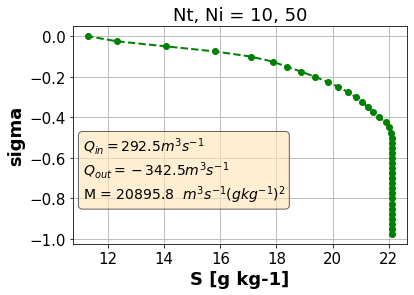

In [11]:
sigma_S_section(salt_Knudsen,salt_Knudsen,sigma,Q_in,Q_out,M,Nt,Ni,Nk_mid,Nk_mid,False)

# 3.2 Mean over time

#### Now, we take a look at specific x sections, but we take the mean over time.

In [12]:
saltM = np.mean(salt[:,:,Ni],0)

In [13]:
sM_in   = np.mean(np.mean(salt[:,:Nk_mid,Ni],0))
sM_out  = np.mean(np.mean(salt[:,Nk_mid+1:,Ni],0))
print('\n s_in = '+str(round(sM_in,2))+' g kg -1')
print('\n s_out = '+str(round(sM_out,2))+' g kg -1')


 s_in = 22.79 g kg -1

 s_out = 20.65 g kg -1


In [14]:
QM_in  = sM_out / ( sM_in - sM_out ) * Q_riv
QM_out = - sM_in / ( sM_in - sM_out ) * Q_riv
MM     = sM_in * sM_out * Q_riv
McM    = - QM_in / QM_out

#### For this 2nd case we find:

In [15]:
print('Q_in  = '+str(round(QM_in,2))+' m3 s-1')
print('Q_out = '+str(round(QM_out,2))+' m3 s-1')
print('M     = '+str(round(MM,2))+' m3 s-1 (g kg -1)**2')
print('Mc    = '+str(round(McM*100,2))+'%')

Q_in  = 483.1 m3 s-1
Q_out = -533.1 m3 s-1
M     = 23536.44 m3 s-1 (g kg -1)**2
Mc    = 90.62%


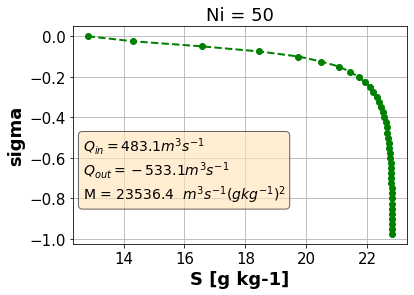

In [16]:
sigma_S_section(saltM,saltM,sigma,QM_in,QM_out,MM,Nt,Ni,Nk_mid,Nk_mid,True)

# 3.3 Mean over time and taking two x sections into account
#### Here I follow Eq. (12) in Burchard et al. (2018) which calculates $s_{in}$ and $s_{out}$ based on the two cross-sections $A$ and $B$:

$s_{in} = \frac{ Q_{in}^{A}s_{in}^{A} + Q_{in}^{B}s_{in}^{B} }{ Q_{in}^{A} + Q_{in}^{B} }$

$s_{out} = \frac{ Q_{out}^{A}s_{out}^{A} + Q_{out}^{B}s_{out}^{B} }{ Q_{out}^{A} + Q_{out}^{B} }$

In [17]:
xA = 25
xB = 100
saltM_A = np.mean(salt[:,:,xA],0)
saltM_B = np.mean(salt[:,:,xB],0)

In [18]:
sM_inA   = np.mean(saltM_A[:Nk_mid])
sM_outA  = np.mean(saltM_A[Nk_mid+1:])
sM_inB   = np.mean(saltM_B[:Nk_mid])
sM_outB  = np.mean(saltM_B[Nk_mid+1:])
print('\n s_inA = '+str(round(sM_inA,2))+' g kg -1')
print('\n s_outA = '+str(round(sM_outA,2))+' g kg -1')
print('\n s_inB = '+str(round(sM_inB,2))+' g kg -1')
print('\n s_outB = '+str(round(sM_outB,2))+' g kg -1')


 s_inA = 27.61 g kg -1

 s_outA = 25.49 g kg -1

 s_inB = 8.26 g kg -1

 s_outB = 6.6 g kg -1


In [19]:
QM_inA  = sM_outA / ( sM_inA - sM_outA ) * Q_riv
QM_outA = - sM_inA / ( sM_inA - sM_outA ) * Q_riv
QM_inB  = sM_outB / ( sM_inB - sM_outB ) * Q_riv
QM_outB = - sM_inB / ( sM_inB - sM_outB ) * Q_riv

In [20]:
# For the plot
QM_inAB  = ( QM_inA + QM_inB ) / 2
QM_outAB = ( QM_outA + QM_outB ) / 2

In [21]:
sM_inAB  = ( QM_inA * sM_inA + QM_inB * sM_inB ) / ( QM_inA + QM_inB )
sM_outAB = ( QM_outA * sM_outA + QM_outB * sM_outB ) / ( QM_outA + QM_outB )

In [22]:
QM_riv = - ( QM_inA + QM_inB + QM_outA + QM_outB )
MM_AB     = sM_inAB * sM_outAB * QM_riv
#McM_AB    = - Q_in / Q_out

In [23]:
print('\n s_in  = '+str(round(sM_inAB,2))+' g kg -1')
print('\n s_out = '+str(round(sM_outAB,2))+' g kg -1')
print('\n M     = '+str(round(MM_AB,2))+' m3 s-1 (g kg -1)**2')


 s_in  = 22.82 g kg -1

 s_out = 20.29 g kg -1

 M     = 46286.41 m3 s-1 (g kg -1)**2


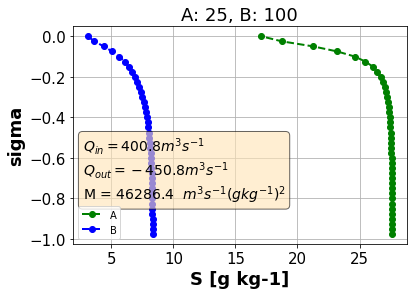

In [24]:
sigma_S_section(saltM_A,saltM_B,sigma,QM_inAB,QM_outAB,MM_AB,Nt,Ni,xA,xB,True,True)